In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Basic information about the dataframe

In [2]:
df = pd.read_csv('data/Crime.csv')
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CrimeRate            47 non-null     float64
 1   Youth                47 non-null     int64  
 2   Southern             47 non-null     int64  
 3   Education            47 non-null     float64
 4   ExpenditureYear0     47 non-null     int64  
 5   LabourForce          47 non-null     int64  
 6   Males                47 non-null     int64  
 7   MoreMales            47 non-null     int64  
 8   StateSize            47 non-null     int64  
 9   YouthUnemployment    47 non-null     int64  
 10  MatureUnemployment   47 non-null     int64  
 11  HighYouthUnemploy    47 non-null     int64  
 12  Wage                 47 non-null     int64  
 13  BelowWage            47 non-null     int64  
 14  CrimeRate10          47 non-null     float64
 15  Youth10              47 non-null     int64

In [4]:
crime_rate_now, crime_rate_10 = df['CrimeRate'], df['CrimeRate10']
expenditure_now, expenditure_10 = df['ExpenditureYear0'], df['ExpenditureYear10']

## Average crime rate now and 10 years ago

In [5]:
avg_crime_rate_now = crime_rate_now.mean()
print(f"Average crime rate now: {avg_crime_rate_now} (num of crimes per million population)")

Average crime rate now: 102.80851063829788 (num of crimes per million population)


In [6]:
avg_crime_rate_10 = crime_rate_10.mean()
print(f"Average crime rate 10 years ago: {avg_crime_rate_10} (num of crimes per million population)")

Average crime rate 10 years ago: 102.07021276595744 (num of crimes per million population)


## Testing the hypothesis about the normality of the crime rate distribution
- **Null hypothesis (H0)**: The crime rate in the data frame is normally distributed.
- **Alternative hypothesis (H1)**: The crime rate in the data frame is not normally distributed.

In [7]:
alpha = 0.05 # significance level

### Histogram of crime rate distribution now

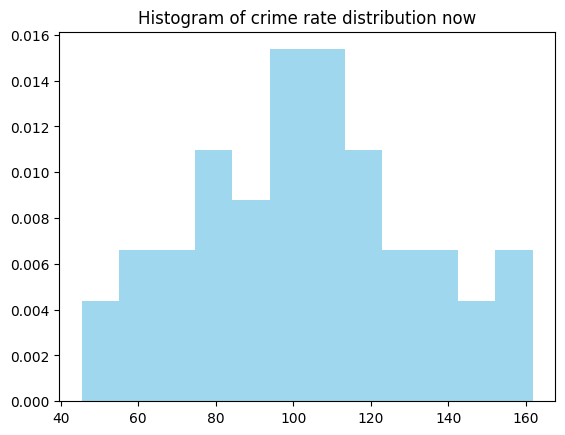

In [8]:
plt.hist(crime_rate_now, bins=12, density=True, alpha=0.8, color='skyblue')
plt.title("Histogram of crime rate distribution now")
plt.show()

### Shapiro-Wilk test to test the hypothesis about the normal distribution of the crime rate now

In [9]:
stat, p_value = stats.shapiro(crime_rate_now)
# If the p-value is greater than alpha, then it is a null hypothesis, otherwise it is an alternative hypothesis
is_normal = True if p_value > alpha else False

print(f"statistic: {stat}\np-value: {p_value}\ndata is normally distributed: {is_normal}")

statistic: 0.9863162040710449
p-value: 0.8507798314094543
data is normally distributed: True


### Histogram of crime rate distribution 10 years ago

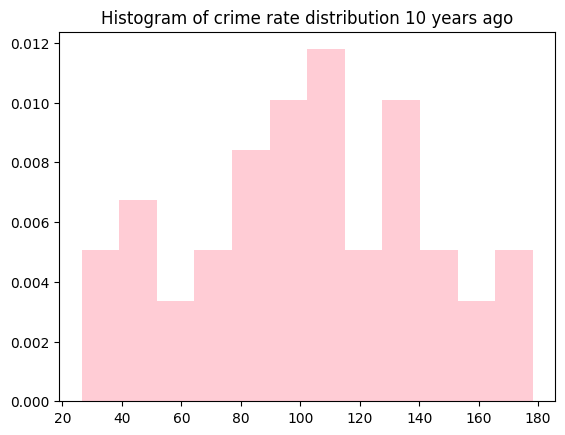

In [10]:
plt.hist(crime_rate_10, bins=12, density=True, alpha=0.8, color='pink')
plt.title("Histogram of crime rate distribution 10 years ago")
plt.show()

### Shapiro-Wilk test to test the hypothesis about the normal distribution of the crime rate 10 years ago

In [11]:
stat, p_value = stats.shapiro(crime_rate_10)
# If the p-value is greater than alpha, then it is a null hypothesis, otherwise it is an alternative hypothesis
is_normal = True if p_value > alpha else False

print(f"statistic: {stat}\np-value: {p_value}\ndata is normally distributed: {is_normal}")

statistic: 0.9819383025169373
p-value: 0.6736325621604919
data is normally distributed: True


**Result**: Since the p-value is greater than the significance level (alpha), we cannot reject the null hypothesis and can claim that the data is similar to a normal distribution.

## Testing the hypothesis of an increase in the crime rate over the past 10 years using the t-Student's test
- **Null hypothesis (H0)**: The average crime rate now is less than or equal to the average crime rate 10 years ago.
- **Alternative hypothesis (H1)**: The average crime rate now is higher than the average crime rate 10 years ago.

In [12]:
t_stat, p_value = stats.ttest_ind(crime_rate_now, crime_rate_10, alternative='greater')
hypothesis = "Alternative (H1)" if p_value < alpha else "Main (H0)"

print(f"t-statistic: {t_stat}\np-value: {p_value}\nHypothesis: {hypothesis}")

t-statistic: 0.10380356564979641
p-value: 0.45877559447438876
Hypothesis: Main (H0)


**Result**: According to the results of the Student's t-test, it can be concluded that there is no statistically significant evidence (p-value > alpha) to support the claim that the crime rate has increased in the past 10 years. We can therefore conclude that the null hypothesis is correct.

## Relationship between crime rate and expenditure on police (Spearman's coefficient)
- **Null hypothesis (H0)**: There is no correlation between crime rate and expenditure on police.
- **Alternative hypothesis (H1)**: There is a correlation between crime rate and expenditure on police.

### Now

In [13]:
spearman_coef, p_value = stats.spearmanr(crime_rate_now, expenditure_now)
significance = True if p_value < alpha else False

print(f"spearman's coefficient: {spearman_coef}\np-value: {p_value}\nsignificance: {significance}")

spearman's coefficient: 0.6493536998413056
p-value: 7.90070925722661e-07
significance: True


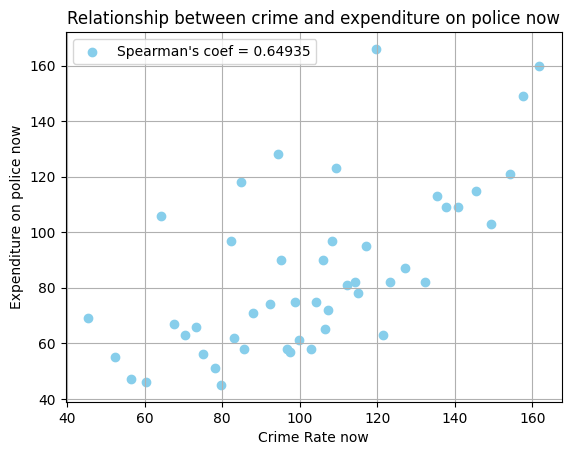

In [14]:
plt.scatter(crime_rate_now, expenditure_now, label=f"Spearman's coef = {spearman_coef:.5f}", color='skyblue')
plt.title("Relationship between crime and expenditure on police now")
plt.xlabel("Crime Rate now")
plt.ylabel("Expenditure on police now")
plt.legend()
plt.grid(True)
plt.show()

### 10 years old

In [15]:
spearman_coef, p_value = stats.spearmanr(crime_rate_10, expenditure_10)
significance = True if p_value < alpha else False

print(f"spearman's coefficient: {spearman_coef}\np-value: {p_value}\nsignificance: {significance}")

spearman's coefficient: 0.6502010618474537
p-value: 7.560084825175775e-07
significance: True


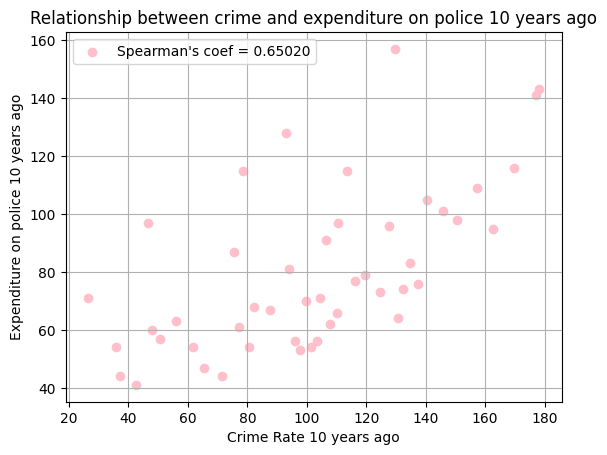

In [16]:
plt.scatter(crime_rate_10, expenditure_10, label=f"Spearman's coef = {spearman_coef:.5f}", color='pink')
plt.title("Relationship between crime and expenditure on police 10 years ago")
plt.xlabel("Crime Rate 10 years ago")
plt.ylabel("Expenditure on police 10 years ago")
plt.legend()
plt.grid(True)
plt.show()

**Result**: In our case, since the p-value is less than alpha, we can reject the null hypothesis. This means that there is enough evidence to conclude that there is a statistically significant relationship between crime rates and police spending (Alternative hypothesis).